# LIMPIEZA DE DATOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("/Users/maria/BootCamp/REPO_MARIA_GARCIA/EDA_STUDENTS-PERFORMANCE-EXAMS/src/data/DataSet.csv")

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Veo su contenido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Compruebo si hay duplicados
df.duplicated().sum()

np.int64(0)

In [5]:
#Elimino la columa race/ethnicity porque no he obtenido información relevante para el análisis
df.drop('race/ethnicity', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [7]:
# Creo una columna con la media de los resultados para trabajarlos después
df['media resultados'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,media resultados
0,female,bachelor's degree,standard,none,72,72,74,72.67
1,female,some college,standard,completed,69,90,88,82.33
2,female,master's degree,standard,none,90,95,93,92.67
3,male,associate's degree,free/reduced,none,47,57,44,49.33
4,male,some college,standard,none,76,78,75,76.33


In [8]:
# Paso los nombres al español para trabajarlos mejor

df.columns = ["genero", "nivel educacion parental", "comedor", "curso preparacion", "resultados matematicas", "resultados lectura", "resultados escritura", "media resultados"]
df.head(12)

,genero,nivel educacion parental,comedor,curso preparacion,resultados matematicas,resultados lectura,resultados escritura,media resultados
0,female,bachelor's degree,standard,none,72,72,74,72.67
1,female,some college,standard,completed,69,90,88,82.33
2,female,master's degree,standard,none,90,95,93,92.67
3,male,associate's degree,free/reduced,none,47,57,44,49.33
4,male,some college,standard,none,76,78,75,76.33
5,female,associate's degree,standard,none,71,83,78,77.33
6,female,some college,standard,completed,88,95,92,91.67
7,male,some college,free/reduced,none,40,43,39,40.67
8,male,high school,free/reduced,completed,64,64,67,65.00
9,female,high school,free/reduced,none,38,60,50,49.33


In [9]:
# Quiero saber los valores únicos de cada columna
# También los numéricos para asegurarme de que las notas son sobre 100

for col in df.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'genero':
['female' 'male']

Valores únicos en la columna 'nivel educacion parental':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Valores únicos en la columna 'comedor':
['standard' 'free/reduced']

Valores únicos en la columna 'curso preparacion':
['none' 'completed']

Valores únicos en la columna 'resultados matematicas':
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

Valores únicos en la columna 'resultados lectura':
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  

In [10]:
#Traduzco también los valores no numéricos
traduccion_genero = {"female": "femenino", "male": "masculino"}
traduccion_educacion = {
    "bachelor's degree": "licenciatura",
    "some college": "algo de universidad",
    "master's degree": "máster",
    "associate's degree": "técnico superior",
    "high school": "instituto",
    "some high school": "algo de instituto"
}
traduccion_comedor = {"standard": "estándar", "free/reduced": "gratis/reducido"}
traduccion_preparacion = {"none": "ninguno", "completed": "completado"}

# Aplico las traducciones
df["genero"] = df["genero"].replace(traduccion_genero)
df["nivel educacion parental"] = df["nivel educacion parental"].replace(traduccion_educacion)
df["comedor"] = df["comedor"].replace(traduccion_comedor)
df["curso preparacion"] = df["curso preparacion"].replace(traduccion_preparacion)
df

,genero,nivel educacion parental,comedor,curso preparacion,resultados matematicas,resultados lectura,resultados escritura,media resultados
0,femenino,licenciatura,estándar,ninguno,72,72,74,72.67
1,femenino,algo de universidad,estándar,completado,69,90,88,82.33
2,femenino,máster,estándar,ninguno,90,95,93,92.67
3,masculino,técnico superior,gratis/reducido,ninguno,47,57,44,49.33
4,masculino,algo de universidad,estándar,ninguno,76,78,75,76.33
...,...,...,...,...,...,...,...,...
995,femenino,máster,estándar,completado,88,99,95,94.00
996,masculino,instituto,gratis/reducido,ninguno,62,55,55,57.33
997,femenino,instituto,gratis/reducido,completado,59,71,65,65.00
998,femenino,algo de universidad,estándar,completado,68,78,77,74.33


# ANÁLISIS

## TABLA DE VARIABLES

In [11]:
# Para crear la tabla vamos a tipificar primero las variables
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
genero,2,0.2,object
nivel educacion parental,6,0.6,object
comedor,2,0.2,object
curso preparacion,2,0.2,object
resultados matematicas,81,8.1,int64
resultados lectura,72,7.2,int64
resultados escritura,77,7.7,int64
media resultados,194,19.4,float64


In [12]:
# Y ahora a tipificar las variables
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
genero,2,0.2,object,Binaria
nivel educacion parental,6,0.6,object,Categorica
comedor,2,0.2,object,Binaria
curso preparacion,2,0.2,object,Binaria
resultados matematicas,81,8.1,int64,Numerica Discreta
resultados lectura,72,7.2,int64,Numerica Discreta
resultados escritura,77,7.7,int64,Numerica Discreta
media resultados,194,19.4,float64,Numerica Discreta


**Dataset:**  DataSet.csv  
**Descripción:**  Datos académicos de un instituto de Estados Unidos y datos demográficos     
**Periodo:**  Sin especificar. 

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas                                           |
|------------------|----------------------------------------------------------|------------------|---------------------|-------------------------------------------------|
| género       | Género del alumno                             | Binaria (categórica)      | 1                   | Son los sujetos expuestos a análisis|
| nivel de educación parental           | Nivel de estudios académicos de los padres                  | Categórica ordinal      | 1                   | ¿Puede influenciar en el desarrollo académico de los hijos?     |
| comedor          | Si disponen de servicio de comedor gratis o no                 | Binaria (categórica)      | 3                   | Es importante el servicio de comedor para el rendimiento académico          |
| curso de preparación        | Realización de un curso previo al examen          | Binaria (categórica)        | 1                   | Importancia de la preparación previa    |
| resultados en matemáticas            | Resultado numérico del 1 al 100            | Numérica Discreta      | 0                   | Valor numérico con el resultado  y esencial para el análisis     |
| resultados en lectura       | Resultado numérico del 1 al 100           | Numérica Discreta         | 0                  | Valor numérico con el resultado y esencial para el análisis       |
| resultados en escritura       | Resultado numérico del 1 al 100             | Numérica Discreta        | 0                   | Valor numérico con el resultado y esencial para el análisis  |
| media de resultados       | Resultado numérico del 1 al 100             | Numérica Discreta        | 1                   | Media de los resultados para tener un valor global |

## ANÁLISIS UNIVARIANTE

#### VARIABLES CATEGÓRICAS

In [13]:
#Calculo la moda para las variables categóricas, creando una tabla con las categóricas.
variables_categoricas = [
    "genero",
    "nivel educacion parental",
    "comedor",
    "curso preparacion"
]
tabla_modas = df[variables_categoricas].mode().T
tabla_modas = tabla_modas.rename(columns={0: "Moda"})
tabla_modas

,Moda
genero,femenino
nivel educacion parental,algo de universidad
comedor,estándar
curso preparacion,ninguno


In [14]:
#Visualizo las frecuencias absolutas en números
for catego in variables_categoricas:
    print(f"Para {catego}")
    print(df[catego].value_counts())
    print(f"\n")

Para genero
genero
femenino     518
masculino    482
Name: count, dtype: int64


Para nivel educacion parental
nivel educacion parental
algo de universidad    226
técnico superior       222
instituto              196
algo de instituto      179
licenciatura           118
máster                  59
Name: count, dtype: int64


Para comedor
comedor
estándar           645
gratis/reducido    355
Name: count, dtype: int64


Para curso preparacion
curso preparacion
ninguno       642
completado    358
Name: count, dtype: int64




In [15]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

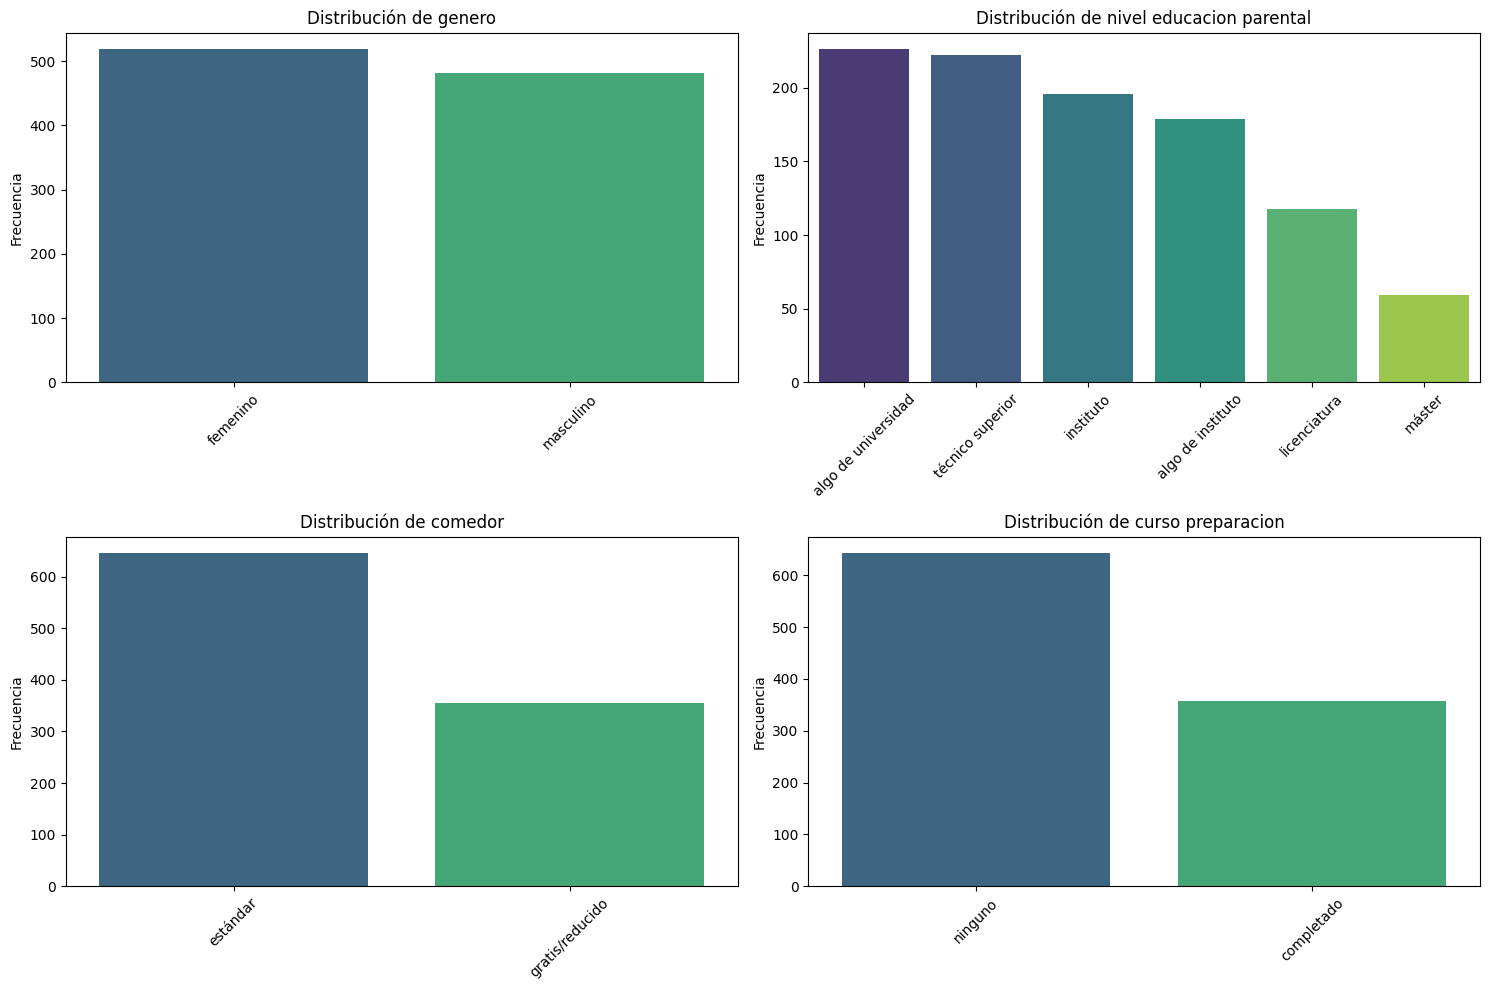

In [16]:
# Después las frecuencias visualmente y como la muestra es de 1000 valores no necesito la relativa
pinta_distribucion_categoricas(df,variables_categoricas)

#### VARIABLES NUMÉRICAS

In [17]:
#Calculo la media para las variables numéricas
df.describe().loc["mean"]

resultados matematicas    66.08900
resultados lectura        69.16900
resultados escritura      68.05400
media resultados          67.77058
Name: mean, dtype: float64

In [18]:
# Y las comparo con la mediana para ver cuál medidor de tendencia es mejor. 
# Los resultados son muy similares, por lo que podemos trabajar con la media.
df.describe().loc["50%"]

resultados matematicas    66.00
resultados lectura        70.00
resultados escritura      69.00
media resultados          68.33
Name: 50%, dtype: float64

In [19]:
df.describe()

,resultados matematicas,resultados lectura,resultados escritura,media resultados
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


In [20]:
variables_numericas = [
    "resultados matematicas",
    "resultados lectura",
    "resultados escritura",
    "media resultados"
]
variables_numericas = df.describe().T.index.to_list()
print(variables_numericas)

['resultados matematicas', 'resultados lectura', 'resultados escritura', 'media resultados']


In [21]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

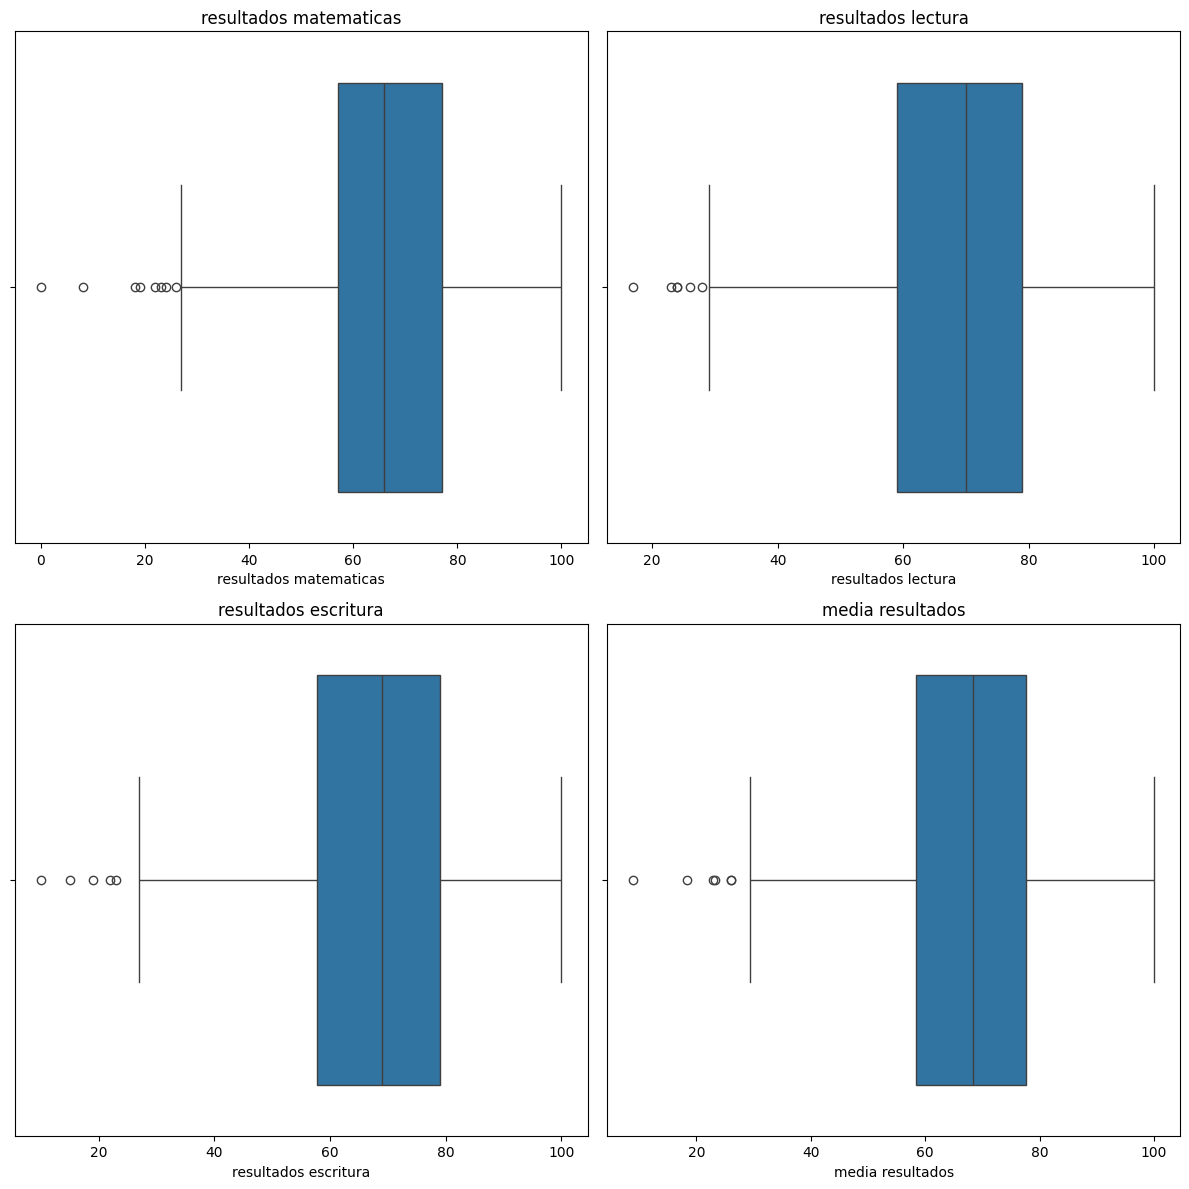

In [22]:
# Compruebo las medidas posicionales con un diagrama de cajas
plot_multiple_boxplots(df, variables_numericas)

In [23]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2,)


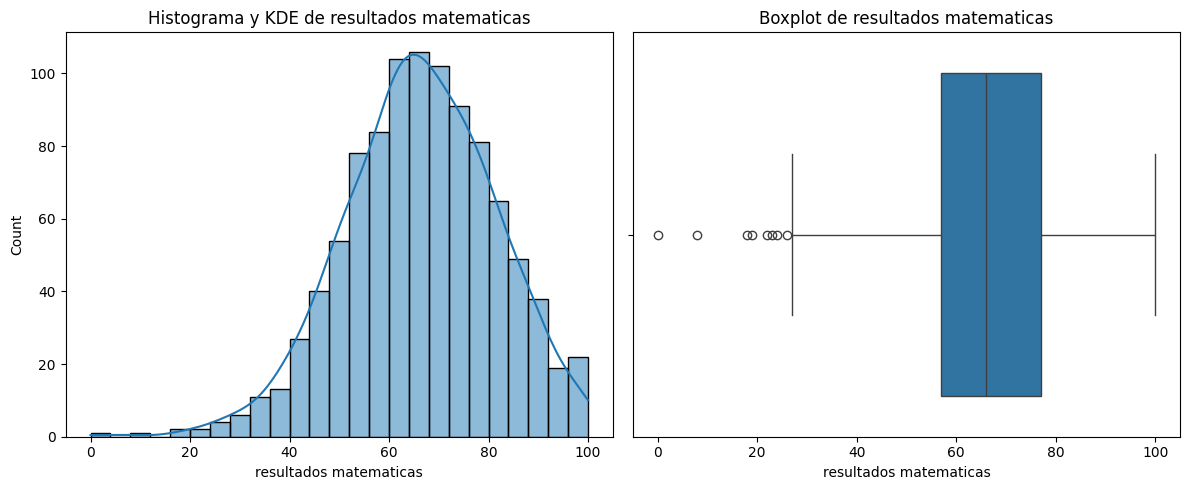

In [24]:
# También utilizo los gráficos combiandos para visualizar la distribución de los valores
plot_combined_graphs(df, ["resultados matematicas"])

(2,)


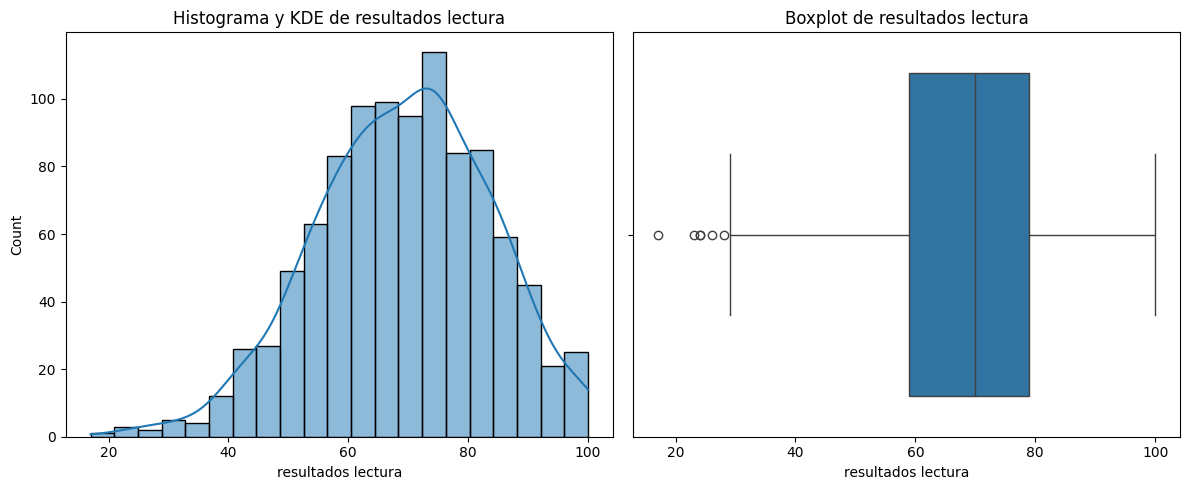

In [25]:
plot_combined_graphs(df, ["resultados lectura"])

(2,)


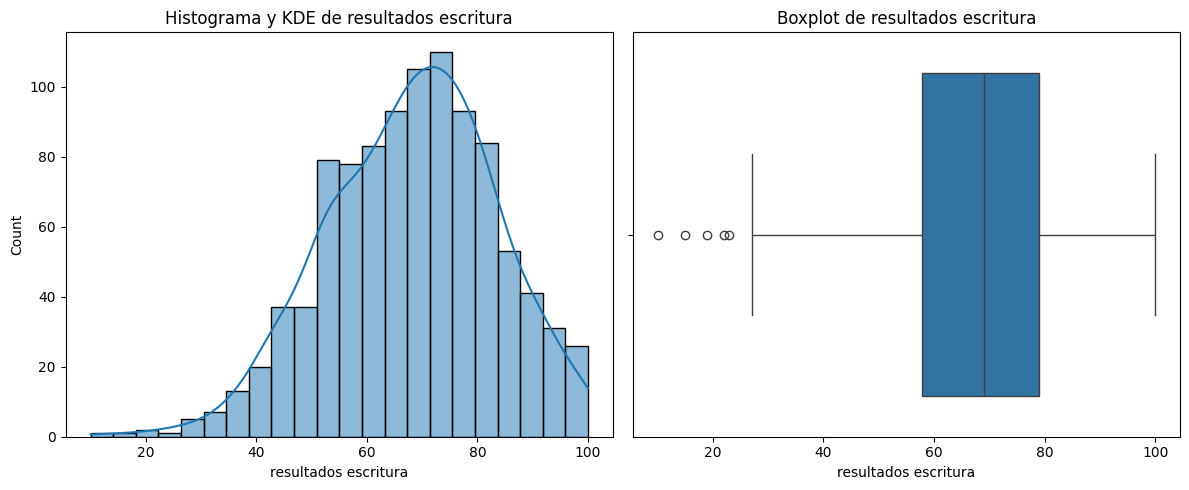

In [26]:
plot_combined_graphs(df, ["resultados escritura"])

## ANÁLISIS BIVARIANTE

#### 1. Relación entre género y resultados en diferentes áreas de estudio (matematicas, lectura, escritura).  
   -  Género - matemáticas
   -  Género - lectura             ----     **Categórica - numérica**
   -  Género -  escritura


In [27]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

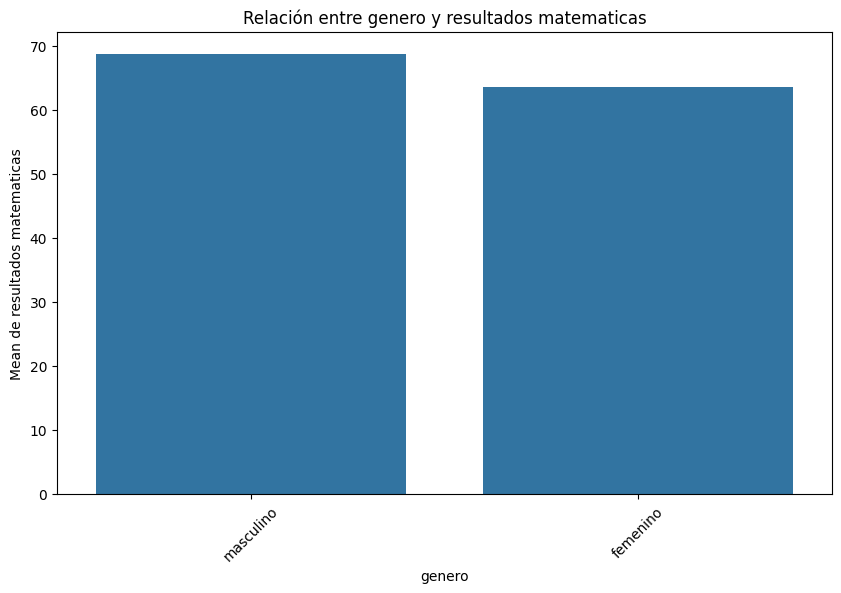

In [28]:
plot_categorical_numerical_relationship(df, "genero", "resultados matematicas", measure ="mean")

In [29]:
def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()

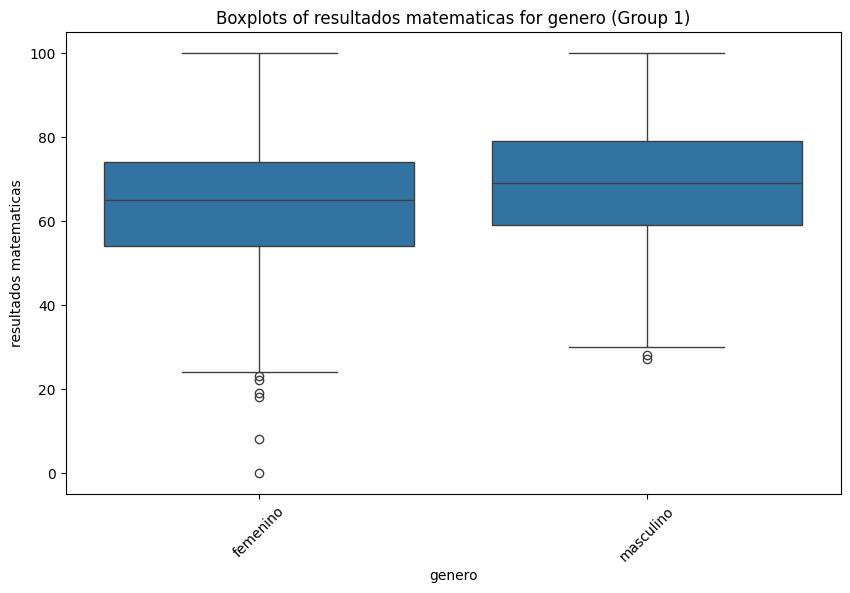

In [30]:
plot_grouped_boxplots(df,"genero", "resultados matematicas" )

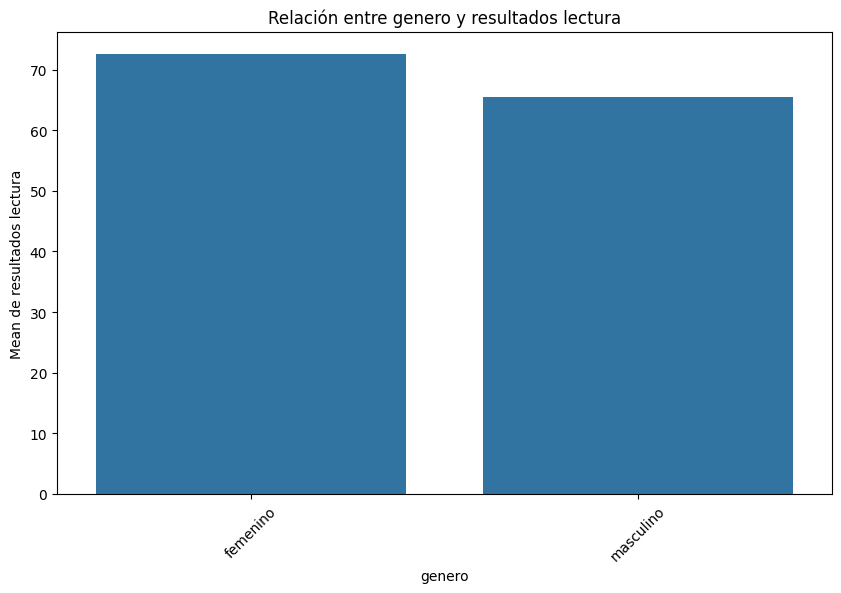

In [31]:
plot_categorical_numerical_relationship(df, "genero", "resultados lectura", measure ="mean")

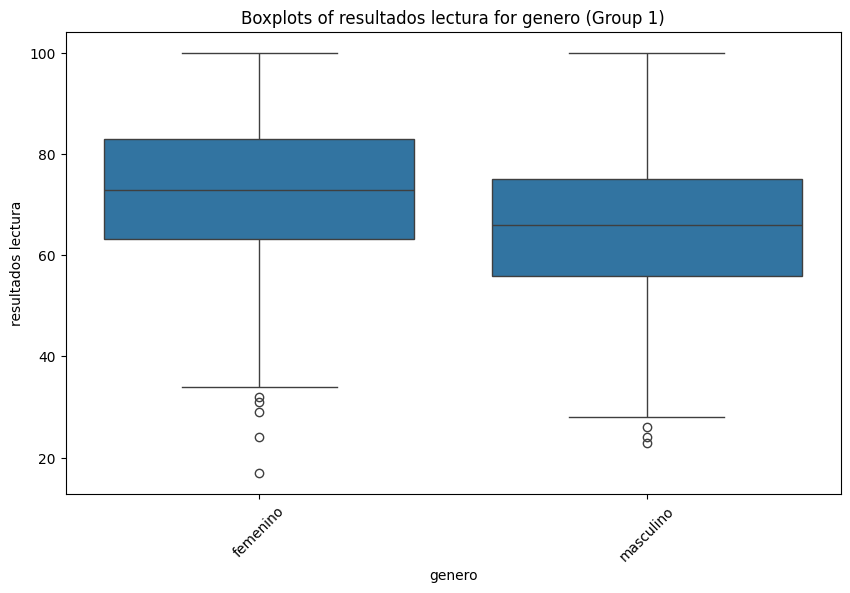

In [32]:
plot_grouped_boxplots(df,"genero", "resultados lectura" )

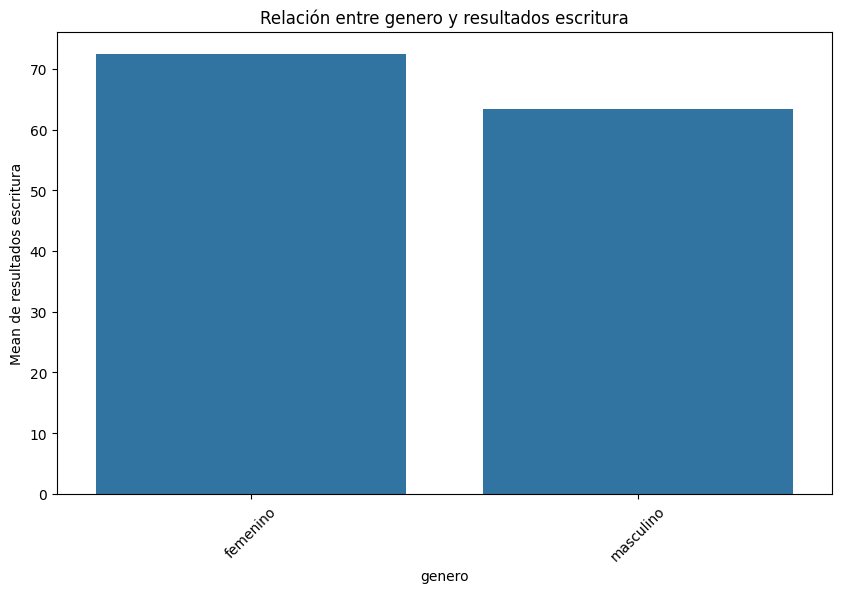

In [33]:
plot_categorical_numerical_relationship(df, "genero", "resultados escritura", measure ="mean")

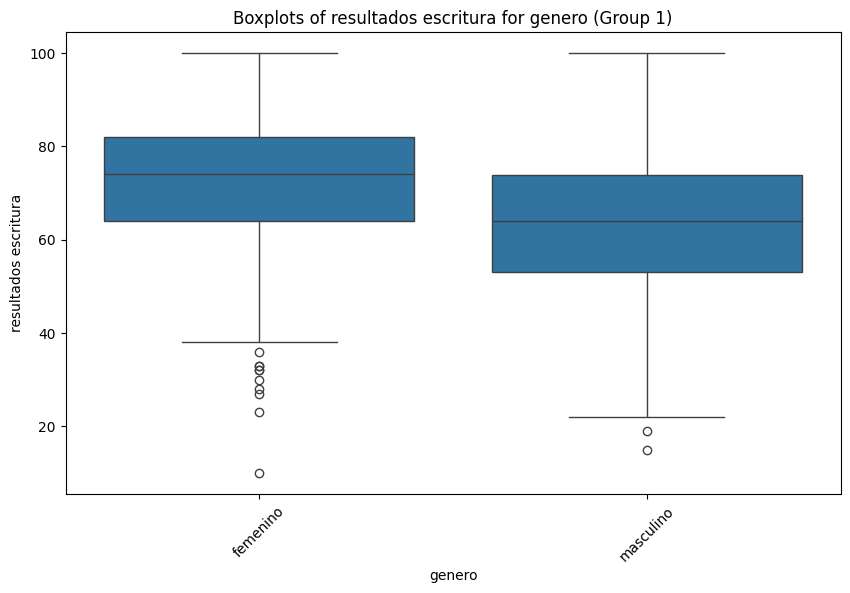

In [34]:
plot_grouped_boxplots(df,"genero", "resultados escritura" )

/var/folders/zm/86wq257d2fl7g7n629th55gc0000gn/T/ipykernel_1212/676863857.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


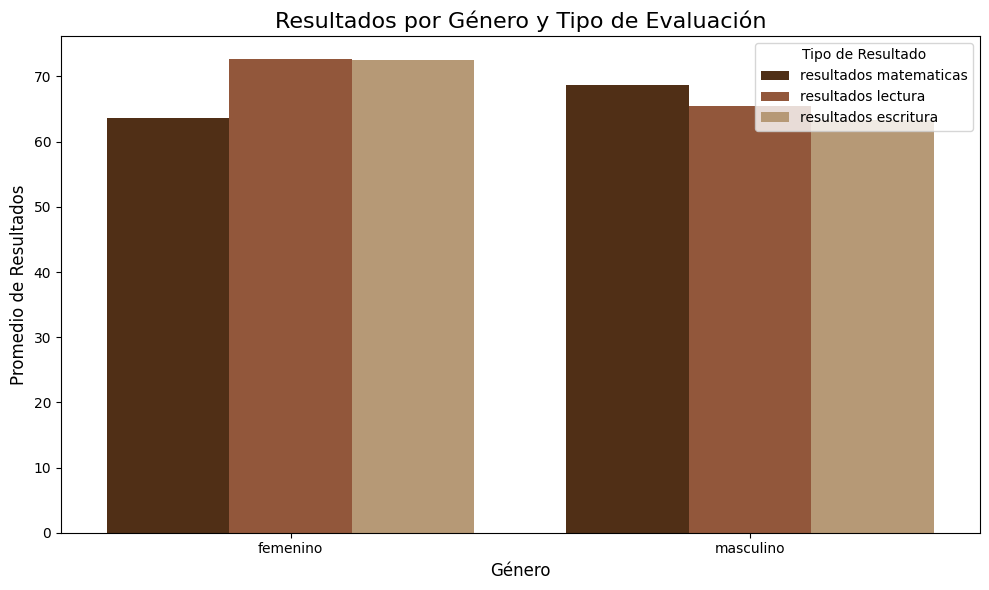

In [76]:
# Creo una figura para la presentación con los colores que se adecuan a mi presentación
# Transformo el DataFrame para que los resultados sean valores en una sola columna
df_melted = df.melt(
    id_vars=["genero"],
    value_vars=["resultados matematicas", "resultados lectura", "resultados escritura"],
    var_name="tipo de resultado",
    value_name="resultado",
)

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x="genero",
    y="resultado",
    hue="tipo de resultado",
    ci=None, 
    palette=sns.color_palette(["#5A2D0C", "#A0522D", "#C19A6B"]),
)

plt.title("Resultados por Género y Tipo de Evaluación", fontsize=16)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Promedio de Resultados", fontsize=12)
plt.legend(title="Tipo de Resultado")
plt.tight_layout()

plt.show();

#### 2.  Relación entre si realizaron o no el curso de preparacion antes de los exámenes y los resultados académicos.
- Curso de preparacion - media de resultados  ---- **Categórica - numérica**

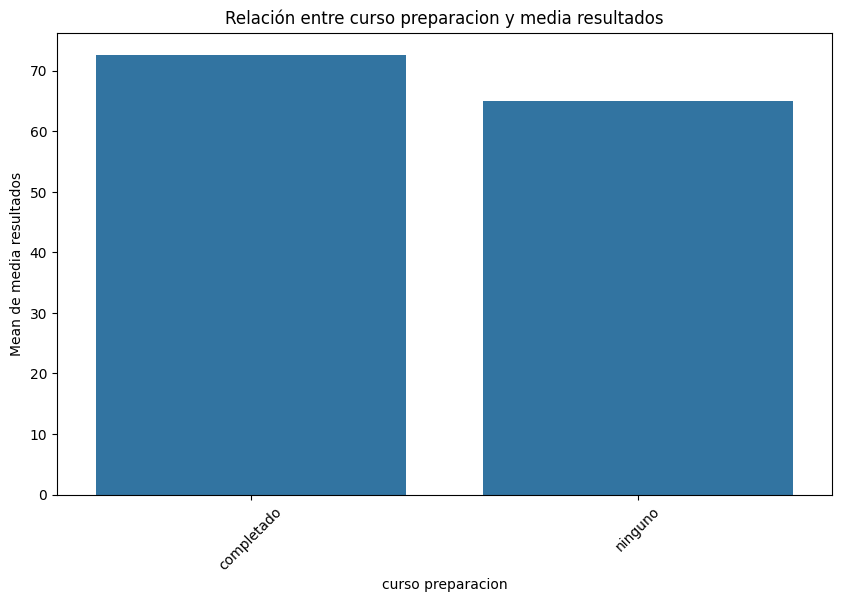

In [35]:
plot_categorical_numerical_relationship(df, "curso preparacion", "media resultados")

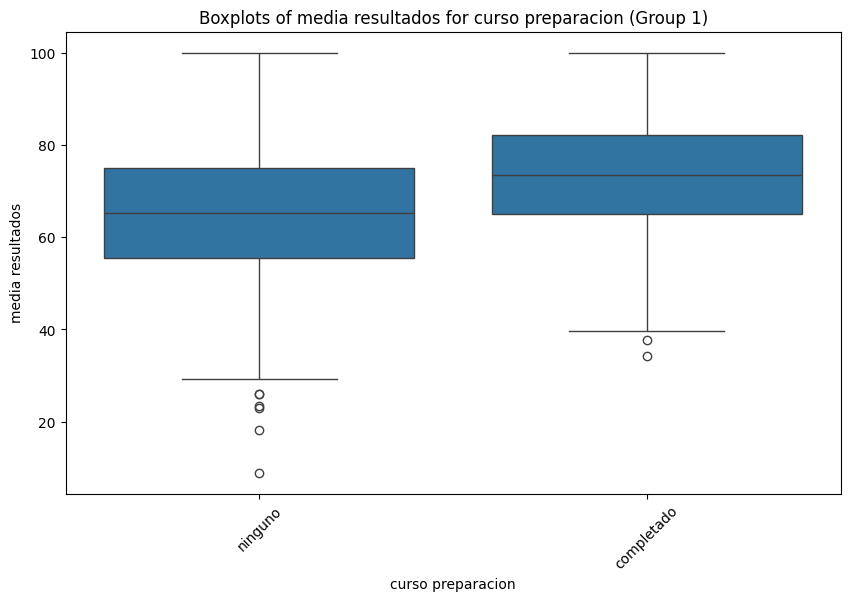

In [36]:
plot_grouped_boxplots(df, "curso preparacion", "media resultados")

In [70]:
def plot_grouped_histograms(df, cat_col, num_col, group_size, bins = "auto"):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    custom_palette = ["#5A2D0C", "#C19A6B"] 
    palette_size = len(custom_palette)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for j, cat in enumerate(subset_cats):
            color = custom_palette[j % palette_size]
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), bins = bins, color=color)
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

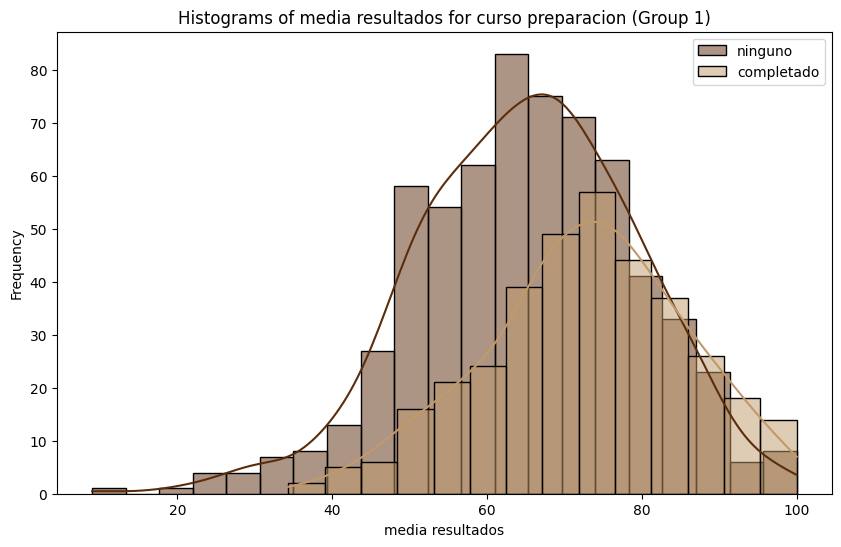

In [75]:
# Cambio los colores en la función para aprovechar esta visualización para la presentación
plot_grouped_histograms(df,"curso preparacion", "media resultados",2)

#### 3. Relación entre género y curso de preparación
- Género - curso de preparación      -----  **Categórica - categórica**

In [72]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)
   
    custom_palette = {"ninguno": "#5A2D0C", "completado": "#C19A6B"}

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset, palette=custom_palette)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data, palette=custom_palette)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

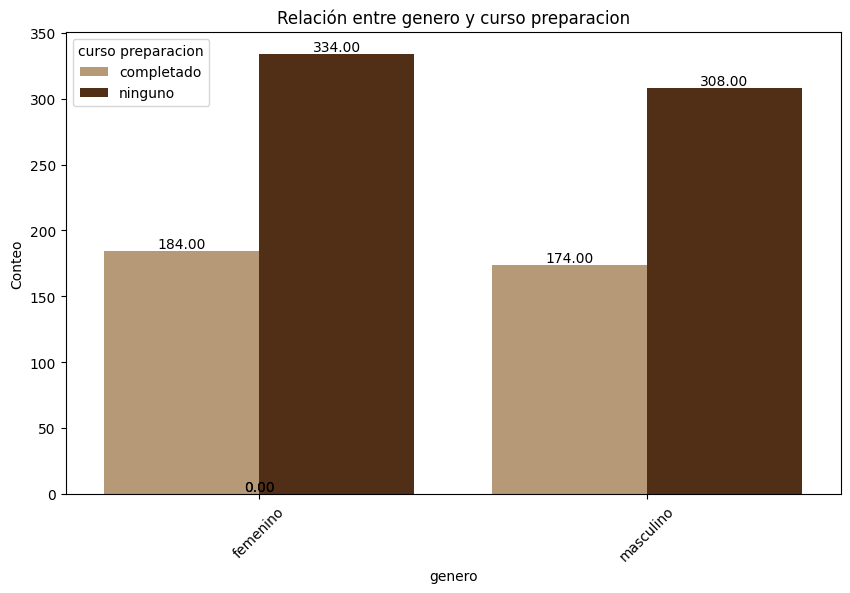

In [74]:
# Cambio los colores en la función para aprovechar esta visualización para la presentación
plot_categorical_relationship_fin(df, "genero","curso preparacion", show_values= True)

In [41]:
tabla_contingencia = pd.crosstab(df["curso preparacion"],
                                df["genero"],
                                margins = False)
tabla_contingencia

genero,femenino,masculino
curso preparacion,,
completado,184,174
ninguno,334,308
